<a href="https://colab.research.google.com/github/Leandrosganioni/Deep-Learning/blob/main/Deep_Learning_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_Brest_Cancer_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Brest Cancer

- Base de dados: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [4]:
import pandas as pd

In [5]:
pd.__version__

'2.2.2'

#Previsores
Os previsores basicamentes são os parâmetros para o que a rede neural pensará, ou seja, nesse contexto, seriam as colunas da tabela, cada informação disponível.
Em machine learning utilizamos o X para atribuir os previsores.

In [6]:
# previsores
X = pd.read_csv('/content/entradas_breast.csv')
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


#Classes
As classes são basicamente a classificação, ou o resultado que a rede neural deve ter de seus calculos.

In [7]:
# classe
y = pd.read_csv('/content/saidas_breast.csv')
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#SKLEARN
Biblioteca de machine learning.

Importa a função train_test_split para fazer divisão da base de dados entre treino e teste.
Ou seja, vou dividir o que vou usar para treinar a RN e o que vou usar para testar o que ela aprendeu.


---



In [8]:
import sklearn
from sklearn.model_selection import train_test_split
sklearn .__version__

'1.5.2'

#Base treino/teste
Vou separar uma base para treinar a rede neural aqui e outra para os testes


---

Aqui, crio algumas variáveis. 2 para o valor de X, que utilizam os dados de previsores, um de treino e outro de teste.


---

Faço o mesmo para o y. E, por fim, atribuo todos àquela função de divisão de treino_teste_divisão colocando como parâmetros as variáveis de previsores e classes + o tamanho do teste, ou seja, defino assim que 25% é para treinar e o restante para teste.

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25)

In [10]:
#Validando o x
print(X_treinamento.shape)
print(X_teste.shape)
#426 para treinar e 143 para testar
#o 30 refere as caracteristicas dos previsores, ou seja, existem 30 colunas de
#caracteristicas previsoras para deduzir o tumor maligno ou benigno

(426, 30)
(143, 30)


In [11]:
#Validando o y
print(y_treinamento.shape)
print(y_teste.shape)
#mesma ideia, 426 para treinar e 143 para testar
#o 1 refere a se é ou não maligno (0 e 1)

(426, 1)
(143, 1)


#Estrutura da Rede Neural
TensorFlow: https://www.tensorflow.org/about/bib?hl=pt-br


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
#Sequencial pois uma rede neural é composta por diversas camadas (entradas, camadas ocultas, etc)
tf.__version__

'2.17.0'

Definindo as camadas da nossa rede neural

1.   A rede neural segue nesse formato de lista;
2.   Definimos a camada de entrada, cuja a mesma terá 30 neurônios (lembrar dos
atributos previsores, eles que são as entradas, e temos 30 colunas)
3.   A camada oculta é a DENSE, tal qual para calcular devemos fazer o seguinte
calculo: (X + qtd_saida) / 2, no nosso exemplo aqui (30 + 1) / 2 = 15.5 --> 16
4.   Ativação RELU pois é uma função para a camada densa da rede neural.
5. Sigmoid pois é uma função para saidas binarizadas (0 ou 1) que é o caso da saida.


In [13]:
rede_neural = Sequential([
    tf.keras.layers.InputLayer(shape = (30,)),#camada de entrada
    tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'),#camada oculta
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid') #saida
])

Visualizando a rede neural criada:

In [14]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

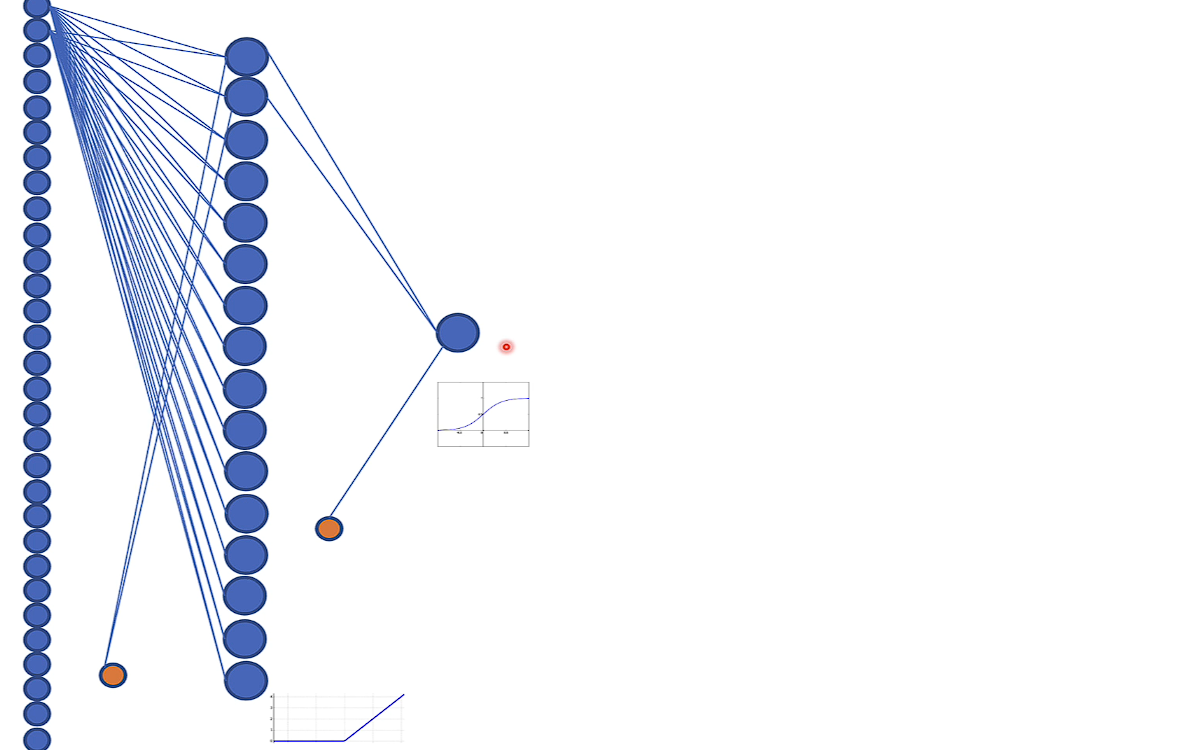

#Compile
Passamos alguns parâmetros para começar a executar como a rede neural irá se comportar.
1. Optimizer - Adam: algorítmo mais usado e recomendado, melhoria da descida de gradiente.
2. loss function - binary_crossentropy = função que será responsável pelos cálculos dos erros, mais recomendada para situações binarizadas.
3. metrics - binary_accuracy = metrica para fazer a avaliação da rede neural, o percentual de acerto.



In [15]:
rede_neural.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

#Treinamento da Rede Neural


---
Função fit = envio os atributos previsores (X_treinamento) e as respostas (y_treinamento). Configuramos o batch_size, que é a quantidade de registros que serão enviados para a rede neural para treinamento (grupos de 10 em 10 registros). São 426 registros / 10 registros = 42.6.
Epochs = Numero de epocas que o treinamento irá ocorrer. Cada época a rede neural vai processar todos os registros.


In [17]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 10, epochs= 100)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.6282 - loss: 16.9802
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6985 - loss: 1.0811
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8573 - loss: 0.6513
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8183 - loss: 0.7617
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8648 - loss: 0.4863
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8163 - loss: 0.5624
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8060 - loss: 0.6180
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8422 - loss: 0.5783
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8717 - loss: 0.3482
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9069 - loss: 0.3479
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8306 

Aqui é dividido em épocas, cada época contendo seu porcentual de acerto e de erro.
Os resultados são calculados somente pela base de treinamento, e não com a base de dados de teste, o que não é ideal.